## Temperature 2m above surface

Exploring the data of var167 for both slo0059 and tes0004 and playing around with different types of plots to this. 

In [10]:
import numpy as np
import xarray as xr
import pandas as pd
import datetime as dt
import calendar
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib.ticker as mticker
from matplotlib.colors import TwoSlopeNorm
import imageio
import os
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [11]:
ds=xr.open_dataset('/nird/datalake/NS1004K/elihho/tes0004_echam6_BOT_mm_0_1850_var167.nc')
da=xr.open_dataset('/nird/datalake/NS1004K/elihho/slo0059_echam6_BOT_mm_0_1850_var167.nc')

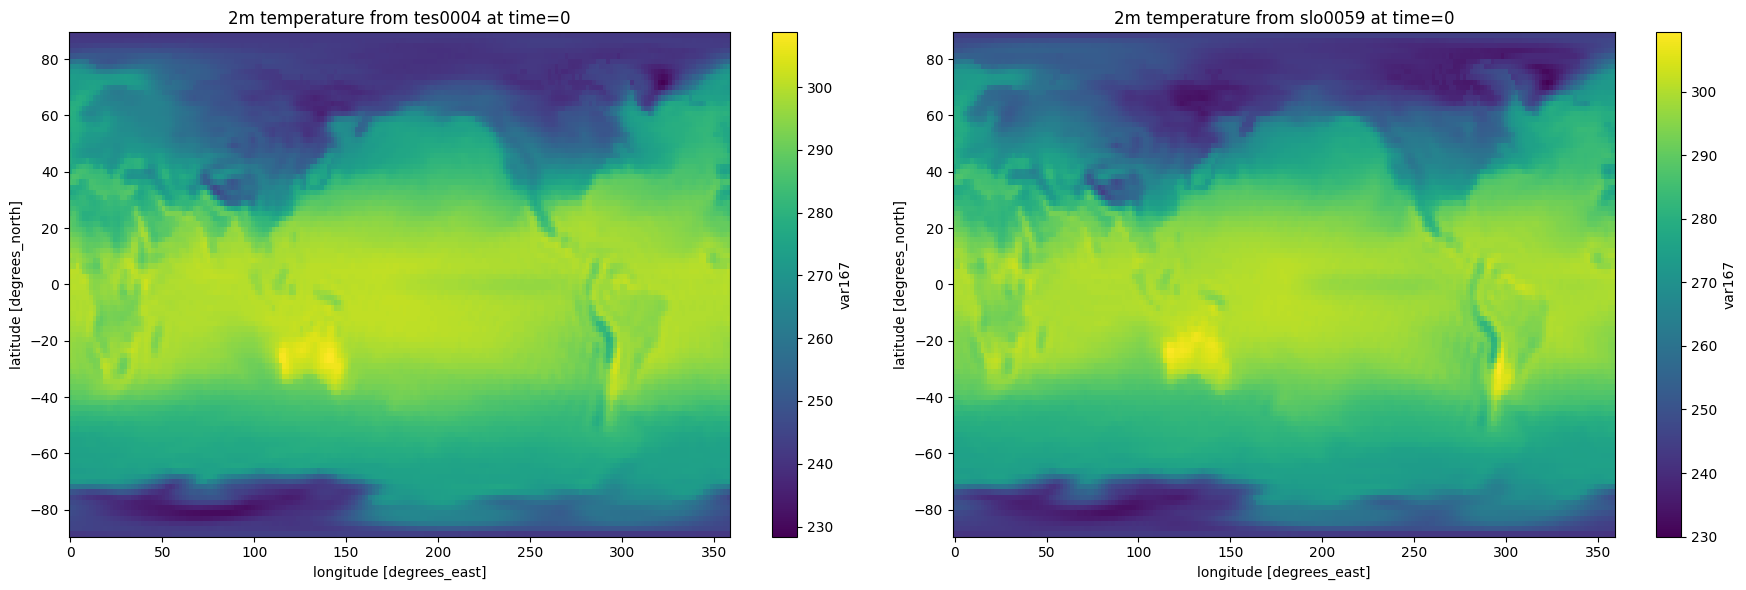

In [12]:
var_tes = ds['var167']
var_slo = da['var167']

# Select a single time step (e.g., the first one)
single_time = var_tes.isel(time=0)
st=var_slo.isel(time=0)

# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(18, 6))

# Plot each time slice
single_time.plot(ax=ax[0], cmap='viridis')
ax[0].set_title("2m temperature from tes0004 at time=0")

st.plot(ax=ax[1], cmap='viridis')
ax[1].set_title("2m temperature from slo0059 at time=0")

plt.tight_layout()
plt.show()

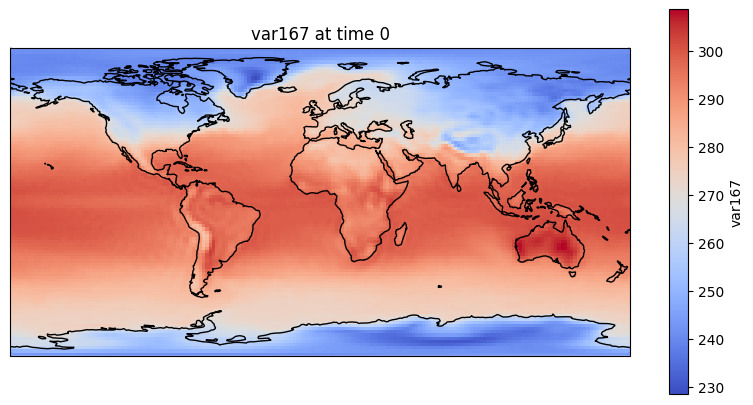

In [13]:
fig = plt.figure(figsize=(10, 5))
ax = plt.axes(projection=ccrs.PlateCarree())

# Select a time slice
data = ds['var167'].isel(time=0)

# Plot
data.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='coolwarm', cbar_kwargs={'label': 'var167'})
ax.coastlines()
ax.set_title('var167 at time 0')
plt.show()

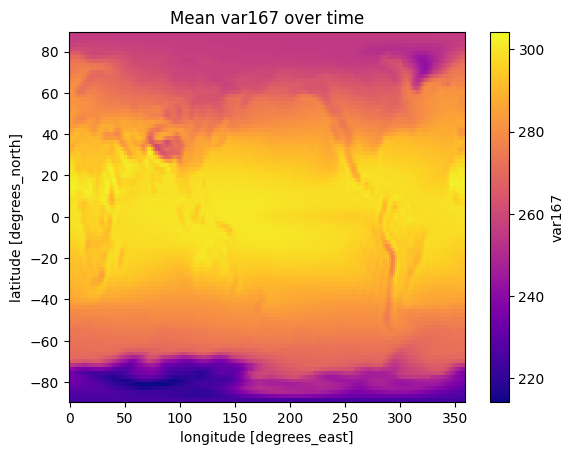

In [14]:
mean_map = ds['var167'].mean(dim='time')
mean_map.plot(cmap='plasma')
plt.title("Mean var167 over time")
plt.show()

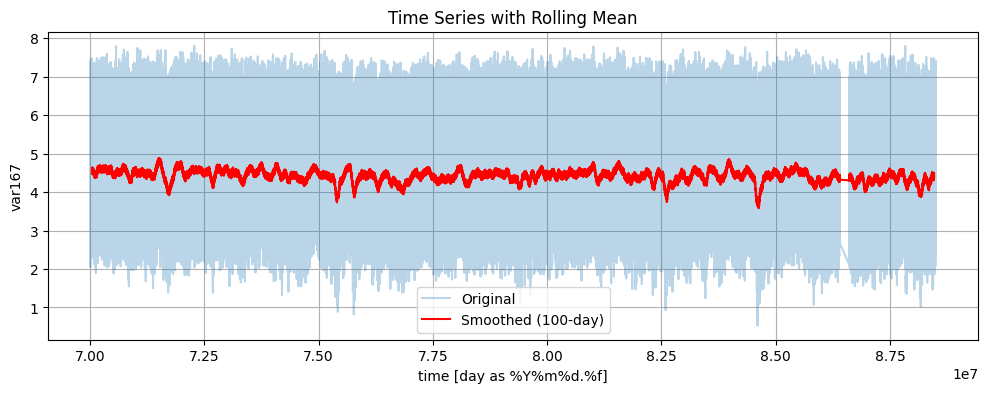

In [15]:
ts = ds["var167"].mean(dim=["lat", "lon"])-273.12
smoothed = ts.rolling(time=100, center=True).mean()

plt.figure(figsize=(12, 4))
ts.plot(label="Original", alpha=0.3)
smoothed.plot(label="Smoothed (100-day)", color='red')
plt.title("Time Series with Rolling Mean")
plt.legend()
plt.grid(True)
plt.show()

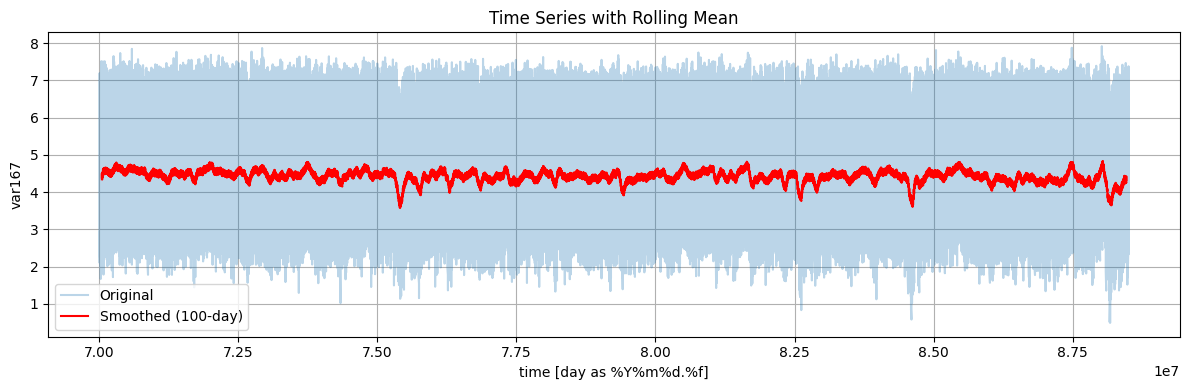

In [16]:
ts1 = da["var167"].mean(dim=["lat", "lon"])-273.12
smoothed = ts1.rolling(time=100, center=True).mean()

plt.figure(figsize=(12, 4))
ts1.plot(label="Original", alpha=0.3)
smoothed.plot(label="Smoothed (100-day)", color='red')
plt.title("Time Series with Rolling Mean")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [17]:
last_date_num = 88501231
first_date_num = 70010131

total_days_num = last_date_num - first_date_num  # ~ 18491100

total_years = 1850  # from 0 to 1850

# Calculate how many "numeric units" per year
units_per_year = total_days_num / total_years  # ~ 9995 units/year

# Now calculate the numeric value corresponding to year 1250 and 1750
def year_to_numeric(year):
    return first_date_num + year * units_per_year

numeric_1250 = year_to_numeric(1250)
numeric_1850 = year_to_numeric(1850)

print(f"Numeric time for year 1250: {numeric_1250}")
print(f"Numeric time for year 1850: {numeric_1850}")

Numeric time for year 1250: 82504117.4864865
Numeric time for year 1850: 88501231.0


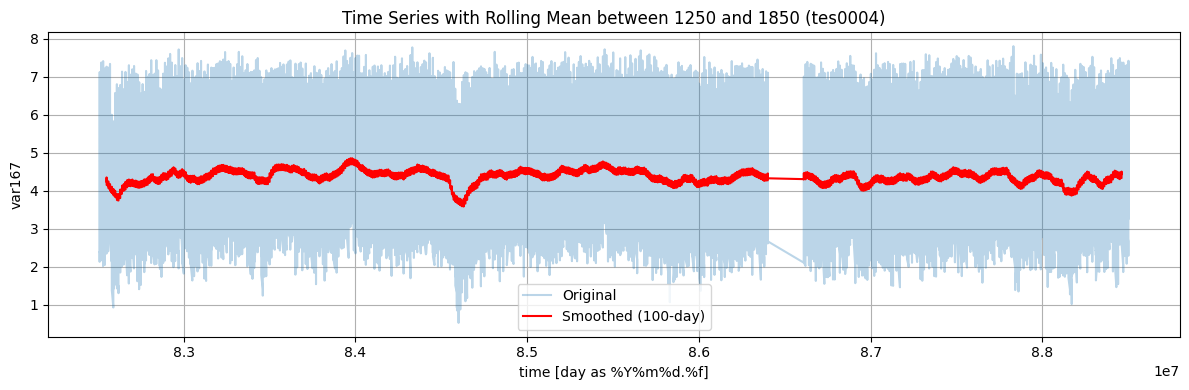

In [18]:
time_1250 = 82504117.4864865  
time_1850 = 88501231.0 

time_mask = (ds.time >= time_1250) & (ds.time <= time_1850)
ts_1250_1850 = ds['var167'].sel(time=time_mask).mean(dim=['lat', 'lon']) - 273.12
smoothed = ts_1250_1850.rolling(time=100, center=True).mean()

plt.figure(figsize=(12, 4))
ts_1250_1850.plot(label="Original", alpha=0.3)
smoothed.plot(label="Smoothed (100-day)", color='red')
plt.title("Time Series with Rolling Mean between 1250 and 1850 (tes0004)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

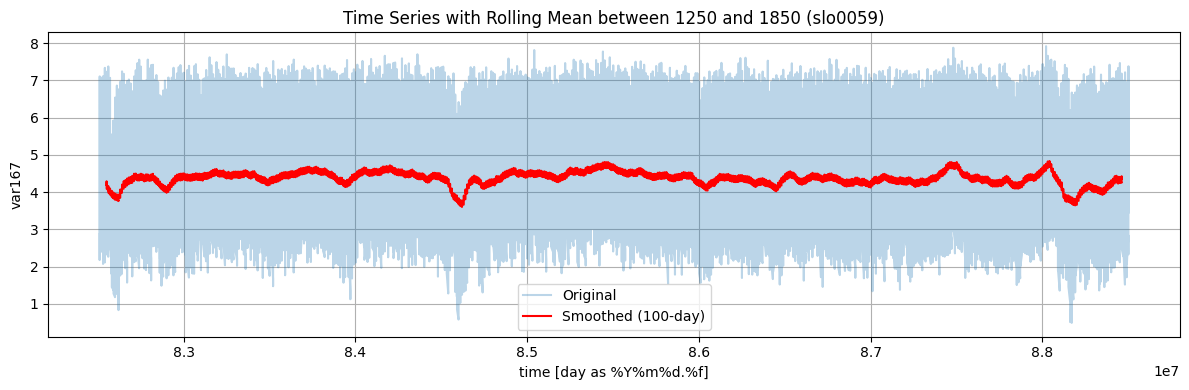

In [19]:
time_mask = (da.time >= time_1250) & (da.time <= time_1850)
ts_1250_1850 = da['var167'].sel(time=time_mask).mean(dim=['lat', 'lon']) - 273.12
smoothed = ts_1250_1850.rolling(time=100, center=True).mean()

plt.figure(figsize=(12, 4))
ts_1250_1850.plot(label="Original", alpha=0.3)
smoothed.plot(label="Smoothed (100-day)", color='red')
plt.title("Time Series with Rolling Mean between 1250 and 1850 (slo0059)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

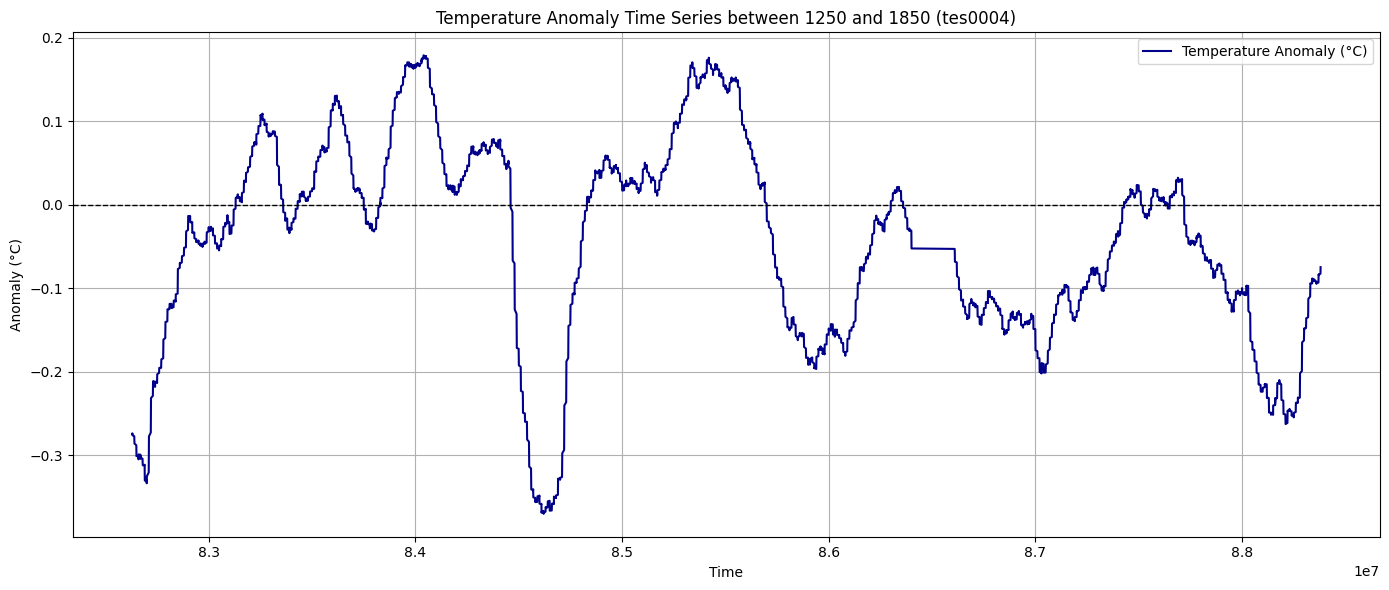

In [20]:
baseline = ts.mean()
anomaly = ts.isel(time=(ds.time >= time_1250) & (ds.time <= numeric_1850)) - baseline

anomaly_smoothed = anomaly.rolling(time=300, center=True).mean()

plt.figure(figsize=(14, 6))
plt.plot(anomaly_smoothed.time, anomaly_smoothed, label='Temperature Anomaly (°C)', color='darkblue')

plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.title('Temperature Anomaly Time Series between 1250 and 1850 (tes0004)')
plt.ylabel('Anomaly (°C)')
plt.xlabel('Time')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

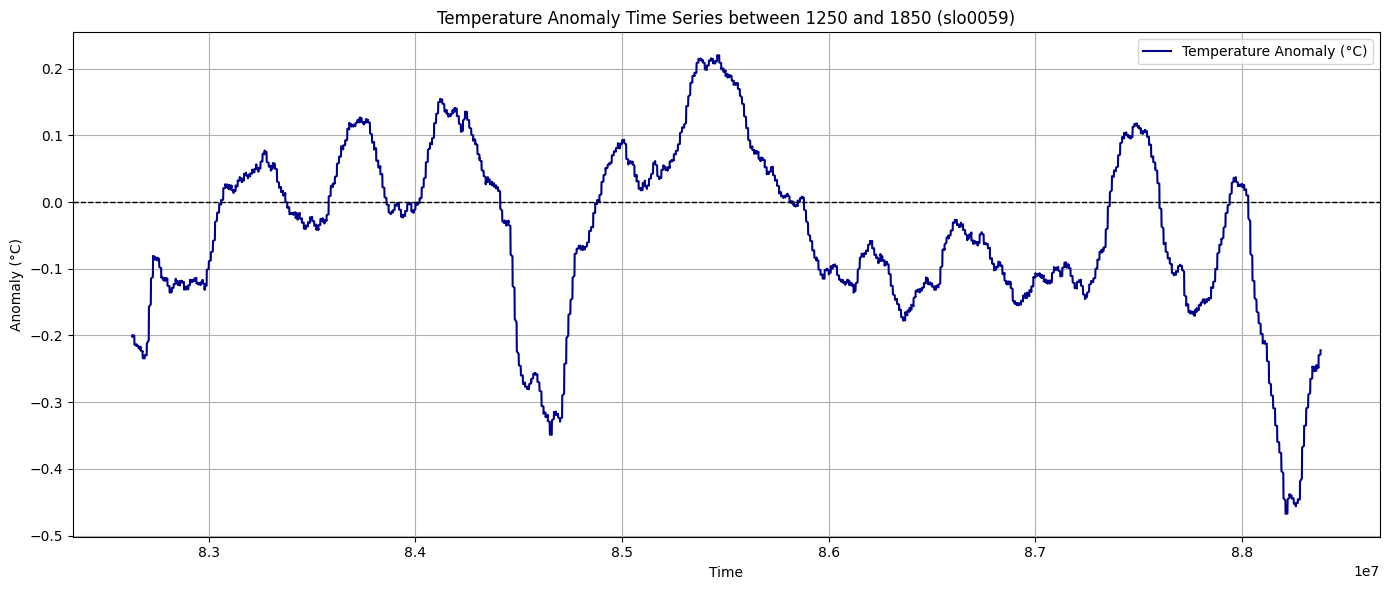

In [22]:
baseline1 = ts1.mean()
anomaly1 = ts1.sel(time=(da.time >= time_1250) & (da.time <= numeric_1850)) - baseline1

anomaly_smoothed1 = anomaly1.rolling(time=300, center=True).mean()

plt.figure(figsize=(14, 6))
anomaly_smoothed1.plot(label='Temperature Anomaly (°C)', color='darkblue')

plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.title('Temperature Anomaly Time Series between 1250 and 1850 (slo0059)')
plt.ylabel('Anomaly (°C)')
plt.xlabel('Time')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

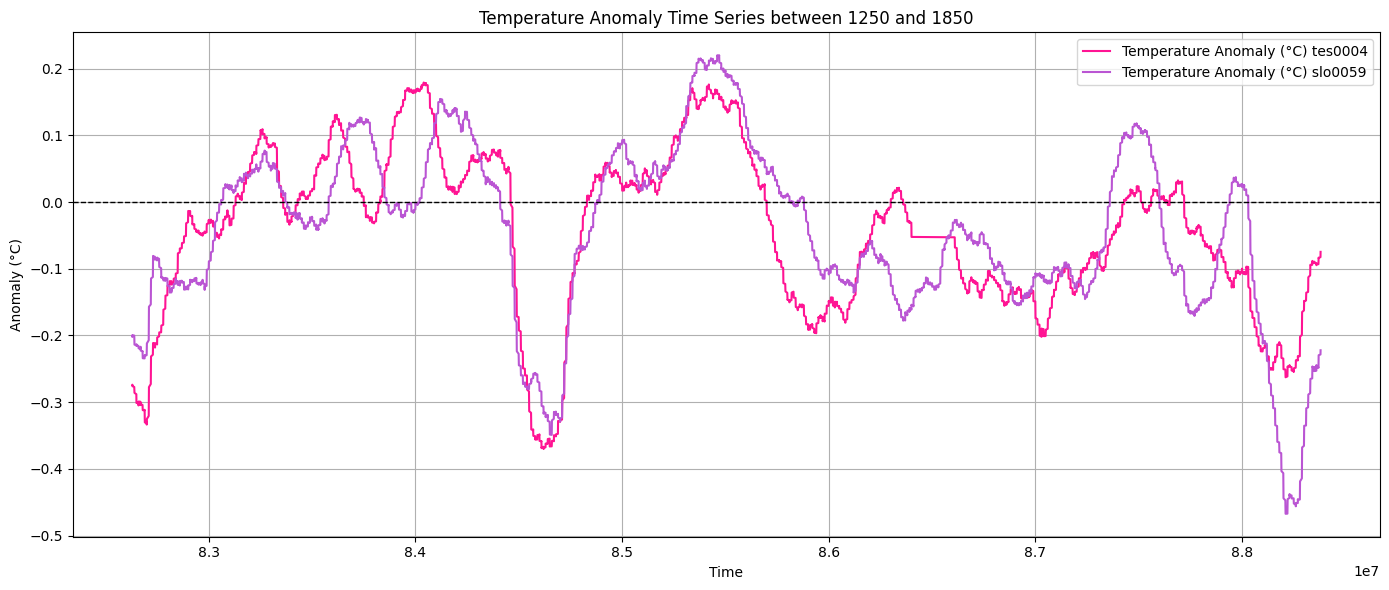

In [23]:
plt.figure(figsize=(14, 6))
anomaly_smoothed.plot(label='Temperature Anomaly (°C) tes0004', color='deeppink')
anomaly_smoothed1.plot(label='Temperature Anomaly (°C) slo0059', color='mediumorchid')

plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.title('Temperature Anomaly Time Series between 1250 and 1850')
plt.ylabel('Anomaly (°C)')
plt.xlabel('Time')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [26]:
float_time = ds.time.values
int_time = float_time.astype(int)  # Take only YYYYMMDD

# Extract year by integer division
raw_years = int_time // 10000

# Correct offset: map to actual years (e.g., 7001 → 1001)
years = raw_years - 7000

In [27]:
volcano = [1257, 1262, 1280, 1362, 1452, 1458, 1477, 1480, 1563, 1580, 1586, 1593, 
           1600, 1625, 1630, 1631, 1640, 1641, 1652, 1660, 1663, 1667, 1673, 1680, 
           1701, 1721, 1739, 1755, 1800, 1808, 1815, 1822, 1831, 1835, 1843]
volcano_times = ds.time.values[np.isin(years, volcano)]

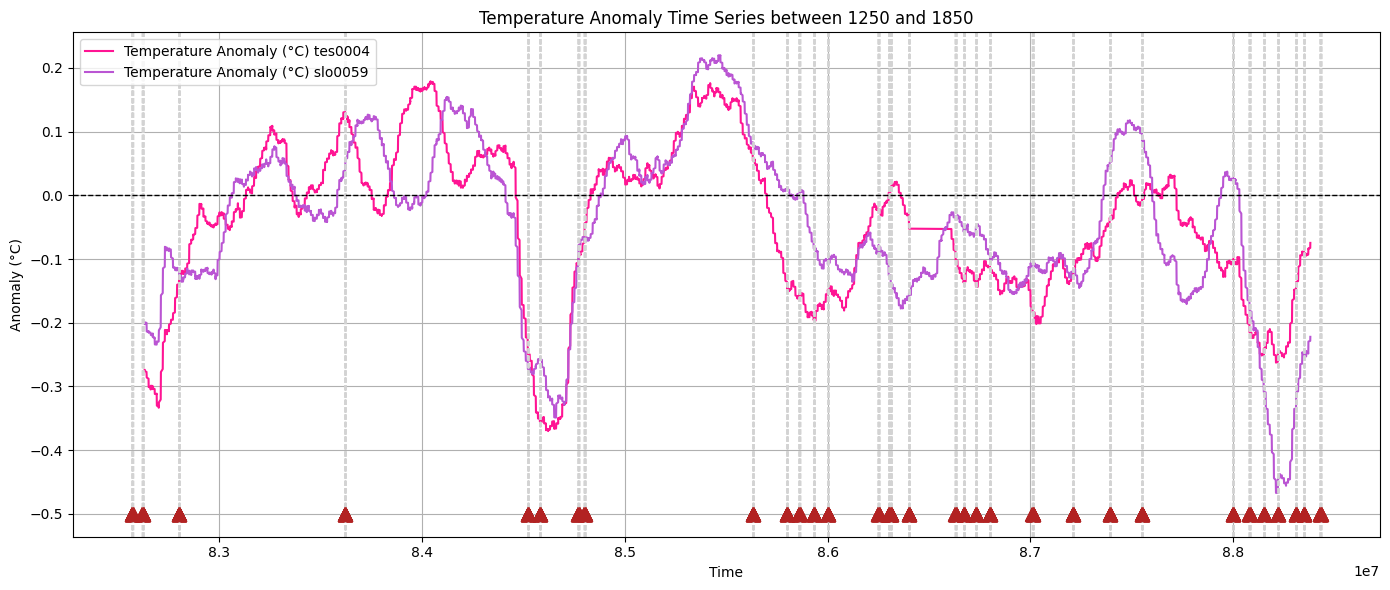

In [28]:
plt.figure(figsize=(14, 6))

# Plot anomalies
anomaly_smoothed.plot(label='Temperature Anomaly (°C) tes0004', color='deeppink')
anomaly_smoothed1.plot(label='Temperature Anomaly (°C) slo0059', color='mediumorchid')

# Add red triangle markers at volcanic years
for vt in volcano_times:
    plt.axvline(x=vt, color='lightgray', linestyle='--', linewidth=1)
    plt.plot(vt, -0.5, marker='^', color='firebrick', markersize=10) 

# Add zero line
plt.axhline(0, color='black', linestyle='--', linewidth=1)

# Labels and legend
plt.title('Temperature Anomaly Time Series between 1250 and 1850')
plt.ylabel('Anomaly (°C)')
plt.xlabel('Time')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Surface temperatures

In [29]:
ds_surf = xr.open_dataset('/nird/datalake/NS1004K/elihho/tes0004_echam6_BOT_mm_0_1850_var169.nc')
da_surf = xr.open_dataset('/nird/datalake/NS1004K/elihho/slo0059_echam6_BOT_mm_0_1850_var169.nc')

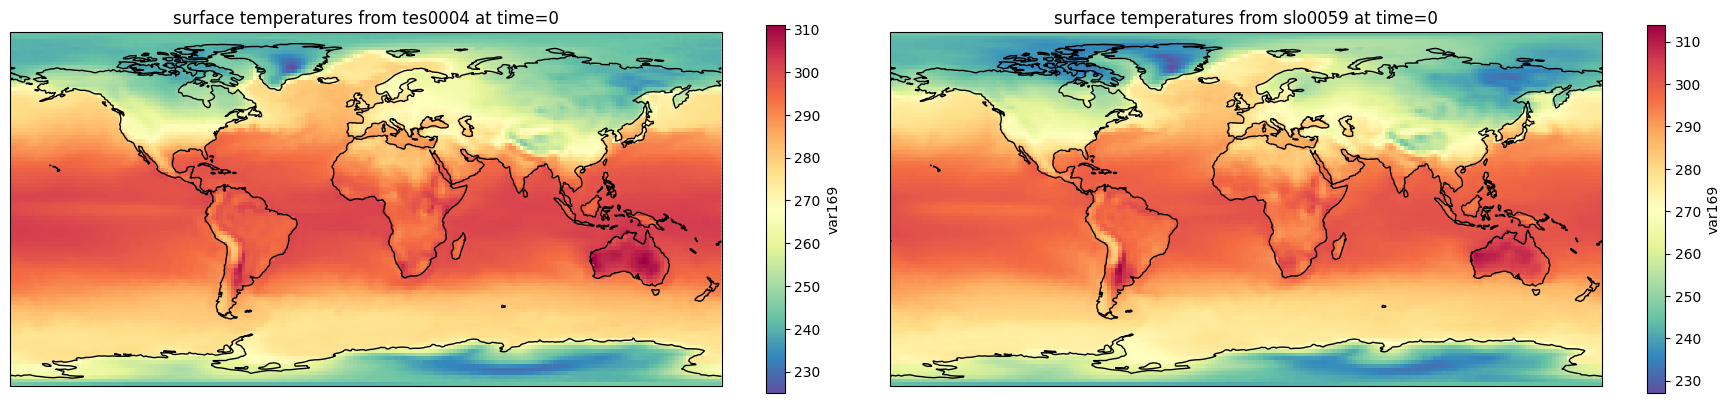

In [30]:
fig, ax = plt.subplots(1,2, figsize=(18, 4), subplot_kw={'projection': ccrs.PlateCarree()})
ds_surf['var169'].isel(time=0).plot(ax=ax[0], transform=ccrs.PlateCarree(), cmap='Spectral_r')
ax[0].coastlines()
ax[0].set_title('surface temperatures from tes0004 at time=0')

da_surf['var169'].isel(time=0).plot(ax=ax[1], transform=ccrs.PlateCarree(), cmap='Spectral_r')
ax[1].coastlines()
ax[1].set_title('surface temperatures from slo0059 at time=0')

plt.tight_layout()
plt.show()

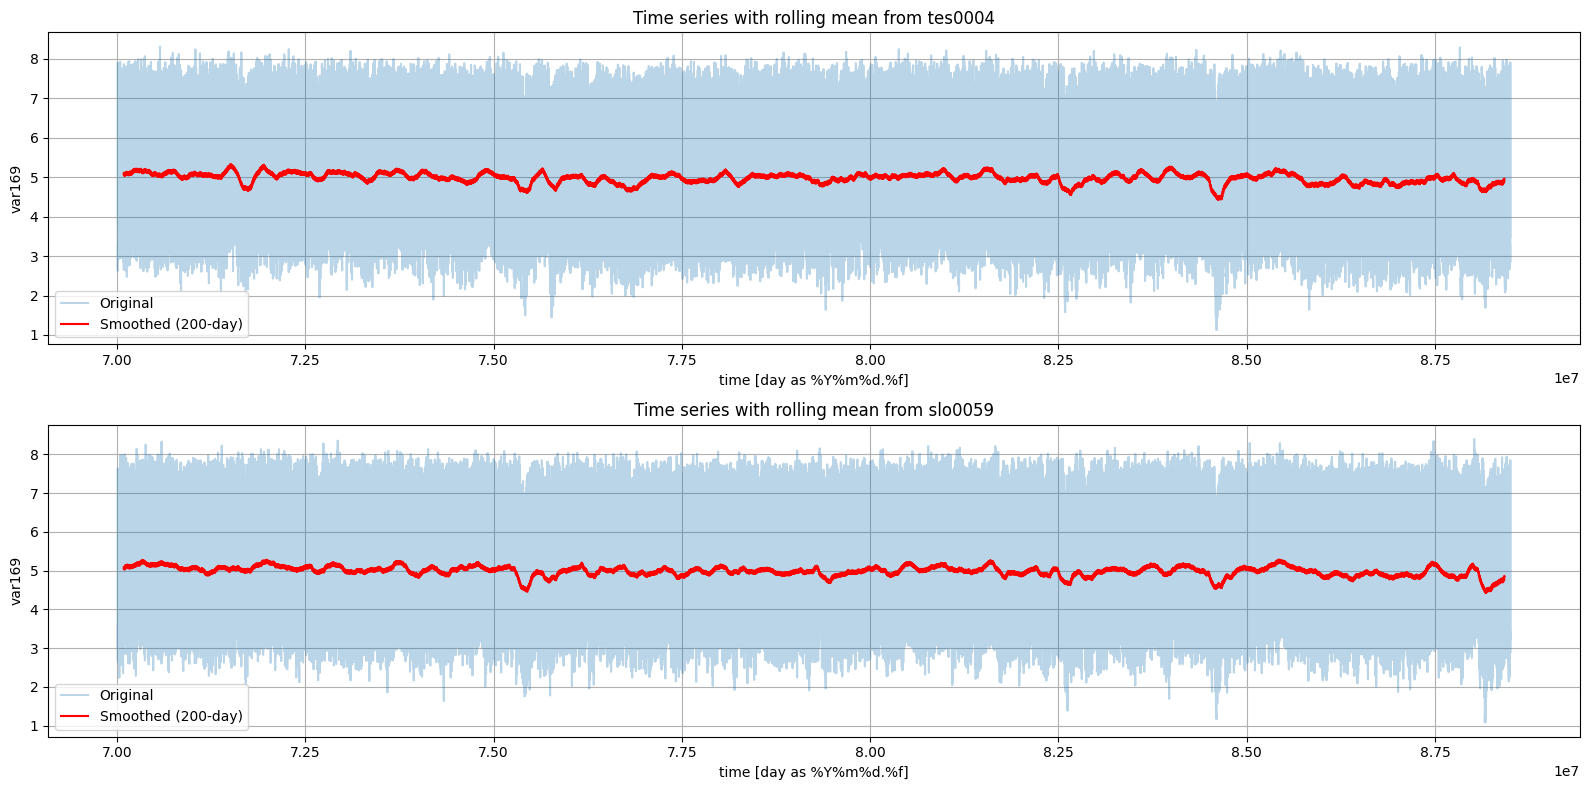

In [31]:
ts_surf=ds_surf['var169'].mean(dim=['lat', 'lon'])-273.12
smoothed_surf=ts_surf.rolling(time=200, center=True).mean()

ts_surfa=da_surf['var169'].mean(dim=['lat', 'lon'])-273.12
smoothed_surfa=ts_surfa.rolling(time=200, center=True).mean()

fig, ax=plt.subplots(2,1, figsize=(16, 8))
ts_surf.plot(ax=ax[0], label='Original', alpha=0.3)
smoothed_surf.plot(ax=ax[0], label='Smoothed (200-day)', color='red')
ax[0].legend()
ax[0].set_title('Time series with rolling mean from tes0004')
ax[0].grid(True)

ts_surfa.plot(ax=ax[1], label='Original', alpha=0.3)
smoothed_surfa.plot(ax=ax[1], label='Smoothed (200-day)', color='red')
ax[1].legend()
ax[1].set_title('Time series with rolling mean from slo0059')
ax[1].grid(True)

plt.tight_layout()
plt.show()

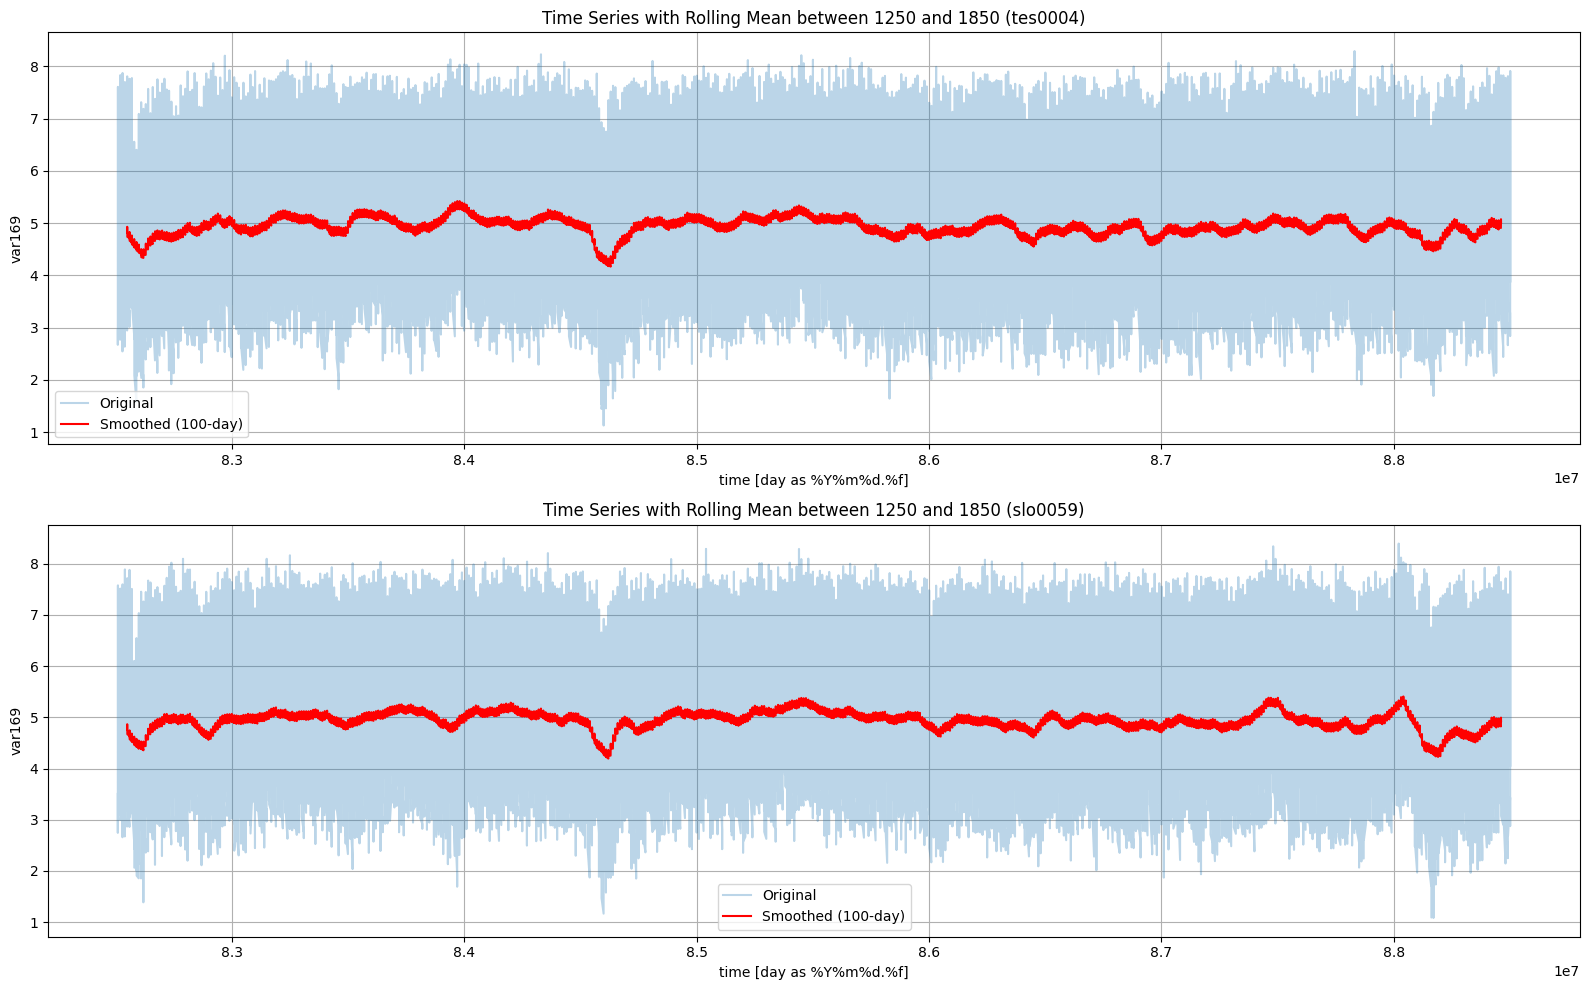

In [32]:
time_1250 = 82504117.4864865  
time_1850 = 88501231.0   

time_mask_s = (ds_surf.time >= time_1250) & (ds_surf.time <= time_1850)
ts_surf_1250_1850 = ds_surf['var169'].sel(time=time_mask_s).mean(dim=['lat', 'lon']) - 273.12
smoothed = ts_surf_1250_1850.rolling(time=100, center=True).mean()

time_mask_sa = (da_surf.time >= time_1250) & (da_surf.time <= time_1850)
ts_surfa_1250_1850 = da_surf['var169'].sel(time=time_mask_sa).mean(dim=['lat', 'lon']) - 273.12
smoothed_a = ts_surfa_1250_1850.rolling(time=100, center=True).mean()

fig, ax= plt.subplots(2,1, figsize=(16, 10))
ts_surf_1250_1850.plot(ax=ax[0], label="Original", alpha=0.3)
smoothed.plot(ax=ax[0], label="Smoothed (100-day)", color='red')
ax[0].set_title("Time Series with Rolling Mean between 1250 and 1850 (tes0004)")
ax[0].legend()
ax[0].grid(True)

ts_surfa_1250_1850.plot(ax=ax[1], label="Original", alpha=0.3)
smoothed_a.plot(ax=ax[1], label="Smoothed (100-day)", color='red')
ax[1].set_title("Time Series with Rolling Mean between 1250 and 1850 (slo0059)")
ax[1].legend()
ax[1].grid(True)

plt.tight_layout()
plt.show()

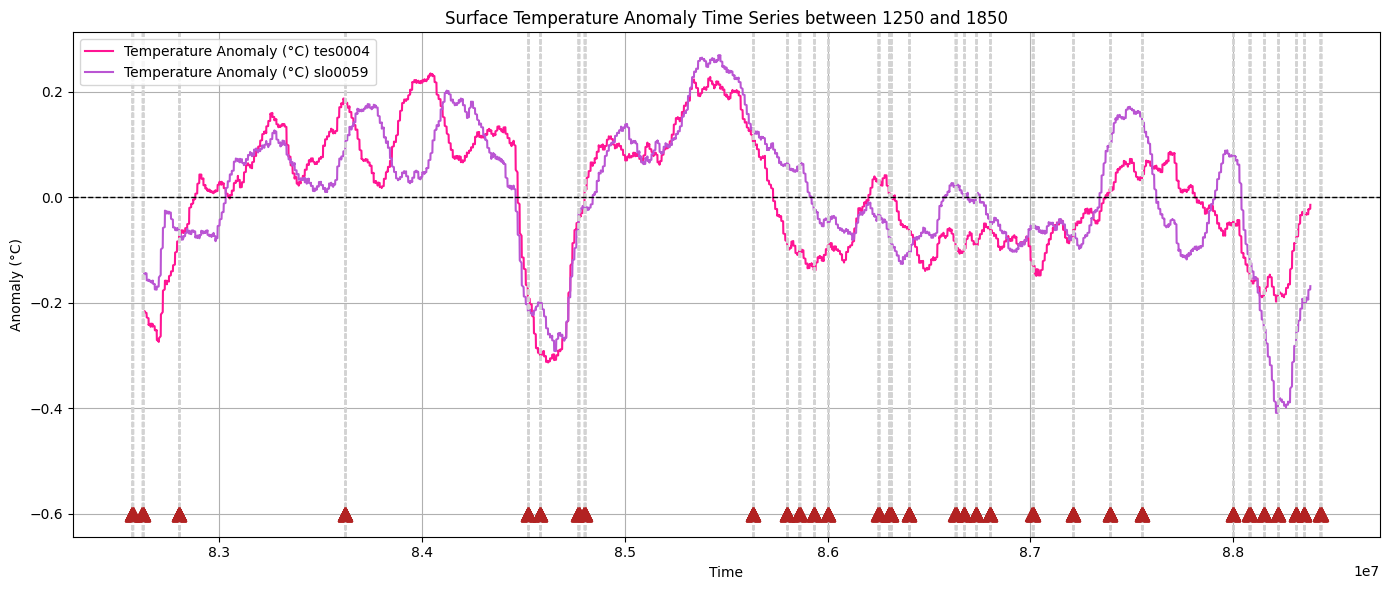

In [51]:
base_surf = ts_surf.sel(time=time_mask_s).mean()
anomaly_surf=ts_surf.sel(time=time_mask_s) - base_surf
anomaly_smooth_surf = anomaly_surf.rolling(time=300, center=True).mean()

base_surfa = ts_surfa.sel(time=time_mask_sa).mean()
anomaly_surfa=ts_surfa.sel(time=time_mask_sa) - base_surfa
anomaly_smooth_surfa = anomaly_surfa.rolling(time=300, center=True).mean()

plt.figure(figsize=(14, 6))

# Plot anomalies
anomaly_smooth_surf.plot(label='Temperature Anomaly (°C) tes0004', color='deeppink')
anomaly_smooth_surfa.plot(label='Temperature Anomaly (°C) slo0059', color='mediumorchid')

# Add red triangle markers at volcanic years
for vt in volcano_times:
    plt.axvline(x=vt, color='lightgray', linestyle='--', linewidth=1)
    plt.plot(vt, -0.6, marker='^', color='firebrick', markersize=10) 

# Add zero line
plt.axhline(0, color='black', linestyle='--', linewidth=1)

# Labels and legend
plt.title('Surface Temperature Anomaly Time Series between 1250 and 1850')
plt.ylabel('Anomaly (°C)')
plt.xlabel('Time')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [52]:
numeric_1250 = year_to_numeric(1250)
numeric_1270 = year_to_numeric(1270)

print(f"Numeric time for year 1250: {numeric_1250}")
print(f"Numeric time for year 1270: {numeric_1270}")

Numeric time for year 1250: 82504117.4864865
Numeric time for year 1270: 82704021.27027027


In [53]:
numeric_1450 = year_to_numeric(1450)
numeric_1470 = year_to_numeric(1470)

print(f"Numeric time for year 1450: {numeric_1450}")
print(f"Numeric time for year 1470: {numeric_1470}")

Numeric time for year 1450: 84503155.32432432
Numeric time for year 1470: 84703059.1081081


In [54]:
numeric_1805 = year_to_numeric(1805)
numeric_1825 = year_to_numeric(1825)

print(f"Numeric time for year 1805: {numeric_1805}")
print(f"Numeric time for year 1825: {numeric_1825}")

Numeric time for year 1805: 88051447.4864865
Numeric time for year 1825: 88251351.27027027


In [55]:
# anomalies
time_mask_s1 = (ds_surf.time >= numeric_1250) & (ds_surf.time <= numeric_1270)
anomaly_surf1=ts_surf.sel(time=time_mask_s1) - base_surf
anomaly_smooth_surf1 = anomaly_surf1.rolling(time=30, center=True).mean()

time_mask_sa1 = (da_surf.time >= numeric_1250) & (da_surf.time <= numeric_1270)
anomaly_surfa1=ts_surfa.sel(time=time_mask_sa1) - base_surfa
anomaly_smooth_surfa1 = anomaly_surfa1.rolling(time=30, center=True).mean()


time_mask_s2 = (ds_surf.time >= numeric_1450) & (ds_surf.time <= numeric_1470)
anomaly_surf2=ts_surf.sel(time=time_mask_s2) - base_surf
anomaly_smooth_surf2 = anomaly_surf2.rolling(time=30, center=True).mean()

time_mask_sa2 = (da_surf.time >= numeric_1450) & (da_surf.time <= numeric_1470)
anomaly_surfa2=ts_surfa.sel(time=time_mask_sa2) - base_surfa
anomaly_smooth_surfa2 = anomaly_surfa2.rolling(time=30, center=True).mean()


time_mask_s3 = (ds_surf.time >= numeric_1805) & (ds_surf.time <= numeric_1825)
anomaly_surf3=ts_surf.sel(time=time_mask_s3) - base_surf
anomaly_smooth_surf3 = anomaly_surf3.rolling(time=30, center=True).mean()

time_mask_sa3 = (da_surf.time >= numeric_1805) & (da_surf.time <= numeric_1825)
anomaly_surfa3=ts_surfa.sel(time=time_mask_sa3) - base_surfa
anomaly_smooth_surfa3 = anomaly_surfa3.rolling(time=30, center=True).mean()

In [56]:
vt_1257 = year_to_numeric(1257)
vt_1453 = year_to_numeric(1453)
vt_1458 = year_to_numeric(1458)
vt_1809 = year_to_numeric(1809)
vt_1815 = year_to_numeric(1815)

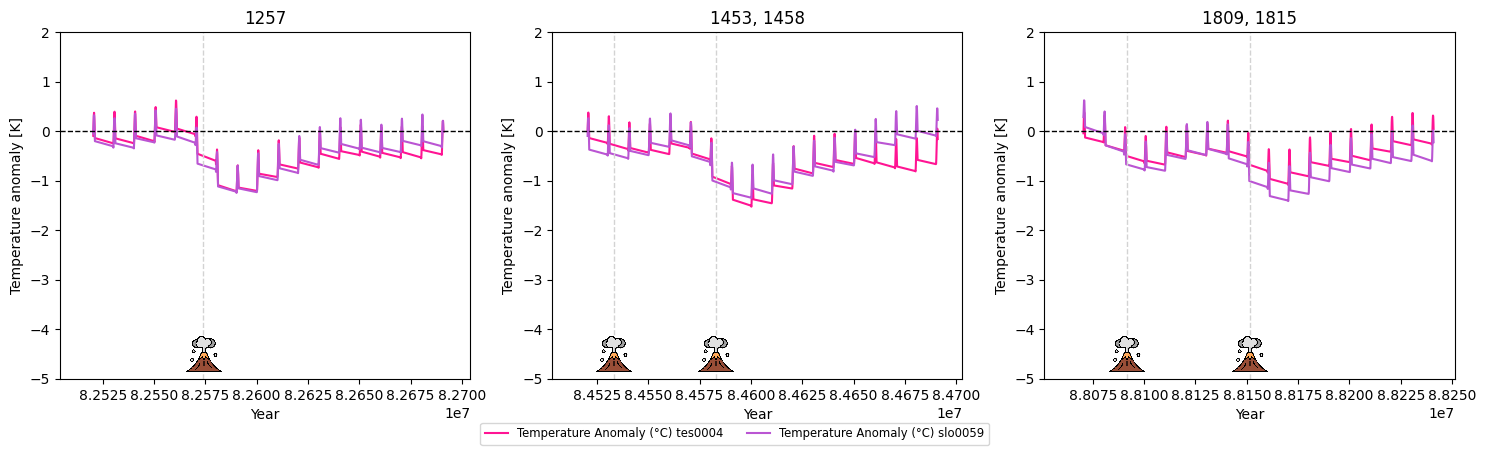

In [57]:
volcano_img = mpimg.imread("volcano.png")
volcano_icon = OffsetImage(volcano_img, zoom=0.05)

fig, ax = plt.subplots(1,3, figsize=(18,4.5))

# Plot anomalies
anomaly_smooth_surf1.plot(ax=ax[0], label='Temperature Anomaly (°C) tes0004', color='deeppink')
anomaly_smooth_surfa1.plot(ax=ax[0], label='Temperature Anomaly (°C) slo0059', color='mediumorchid')
volcano=[vt_1257]
for vt in volcano:
    ax[0].axvline(x=vt, color='lightgray', linestyle='--', linewidth=1)
    ab0 = AnnotationBbox(volcano_icon, (vt, -4.5), frameon=False, box_alignment=(0.5, 0.5))
    ax[0].add_artist(ab0)
ax[0].set_xlim(numeric_1250, numeric_1270)
ax[0].set_ylim(-5, 2)
# Add zero line
ax[0].axhline(0, color='black', linestyle='--', linewidth=1)
ax[0].set_title('1257')
ax[0].set_ylabel('Temperature anomaly [K]')
ax[0].set_xlabel('Year')

anomaly_smooth_surf2.plot(ax=ax[1], label='Temperature Anomaly (°C) tes0004', color='deeppink')
anomaly_smooth_surfa2.plot(ax=ax[1], label='Temperature Anomaly (°C) slo0059', color='mediumorchid')
volcano=[vt_1453, vt_1458]
for vt in volcano:
    ax[1].axvline(x=vt, color='lightgray', linestyle='--', linewidth=1)
    ab1 = AnnotationBbox(volcano_icon, (vt, -4.5), frameon=False, box_alignment=(0.5, 0.5))
    ax[1].add_artist(ab1) 
ax[1].set_xlim(numeric_1450, numeric_1470)
ax[1].set_ylim(-5,2)
# Add zero line
ax[1].axhline(0, color='black', linestyle='--', linewidth=1)
ax[1].set_title('1453, 1458')
ax[1].set_ylabel('Temperature anomaly [K]')
ax[1].set_xlabel('Year')

anomaly_smooth_surf3.plot(ax=ax[2], label='Temperature Anomaly (°C) tes0004', color='deeppink')
anomaly_smooth_surfa3.plot(ax=ax[2], label='Temperature Anomaly (°C) slo0059', color='mediumorchid')
volcano=[vt_1809, vt_1815]
for vt in volcano:
    ax[2].axvline(x=vt, color='lightgray', linestyle='--', linewidth=1)
    ab2 = AnnotationBbox(volcano_icon, (vt, -4.5), frameon=False, box_alignment=(0.5, 0.5))
    ax[2].add_artist(ab2) 
ax[2].set_xlim(numeric_1805, numeric_1825)
ax[2].set_ylim(-5,2)
# Add zero line
ax[2].axhline(0, color='black', linestyle='--', linewidth=1)
ax[2].set_title('1809, 1815')
ax[2].set_ylabel('Temperature anomaly [K]')
ax[2].set_xlabel('Year')

# Shared legend
handles, labels = ax[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.05), ncol=2, fontsize='small', frameon=True)

Trying to look at the temperatures for scandinavia as well, and compare to the global changes.

In [40]:
scandinavia_lat = slice(84, 50)
scandinavia_lon = slice(-10, 50)

scand59 = da_surf.sel(lat=scandinavia_lat, lon=scandinavia_lon)
scand04 = ds_surf.sel(lat=scandinavia_lat, lon=scandinavia_lon)

ts_scand59 = scand59['var169'].mean(dim=['lat', 'lon'])-273.12
ts_scand04 = scand04['var169'].mean(dim=['lat', 'lon'])-273.12

In [58]:
time_scand59 = (scand59.time >= time_1250) & (scand59.time <= time_1850)
time_scand04 = (scand04.time >= time_1250) & (scand04.time <= time_1850)

base_surf59 = ts_scand59.sel(time=time_scand59).mean()
base_surf04 = ts_scand04.sel(time=time_scand04).mean()

# anomalies

anomaly_surf591=ts_scand59.sel(time=time_mask_591) - base_surf59
anomaly_smooth_surf591 = anomaly_surf591.rolling(time=30, center=True).mean()

time_mask_041 = (scand04.time >= numeric_1250) & (scand04.time <= numeric_1270)
anomaly_surf041=ts_scand04.sel(time=time_mask_sa1) - base_surf04
anomaly_smooth_surf041 = anomaly_surf041.rolling(time=30, center=True).mean()


time_mask_592 = (scand59.time >= numeric_1450) & (scand59.time <= numeric_1470)
anomaly_surf592=ts_scand59.sel(time=time_mask_592) - base_surf59
anomaly_smooth_surf592 = anomaly_surf592.rolling(time=30, center=True).mean()

time_mask_s042 = (scand04.time >= numeric_1450) & (scand04.time <= numeric_1470)
anomaly_surf042=ts_scand04.sel(time=time_mask_s042) - base_surf04
anomaly_smooth_surf042 = anomaly_surf042.rolling(time=30, center=True).mean()


time_mask_593 = (scand59.time >= numeric_1805) & (scand59.time <= numeric_1825)
anomaly_surf593=ts_scand59.sel(time=time_mask_593) - base_surf59
anomaly_smooth_surf593 = anomaly_surf593.rolling(time=30, center=True).mean()

time_mask_s043 = (scand04.time >= numeric_1805) & (scand04.time <= numeric_1825)
anomaly_surf043=ts_scand04.sel(time=time_mask_s043) - base_surf04
anomaly_smooth_surf043 = anomaly_surf043.rolling(time=30, center=True).mean()

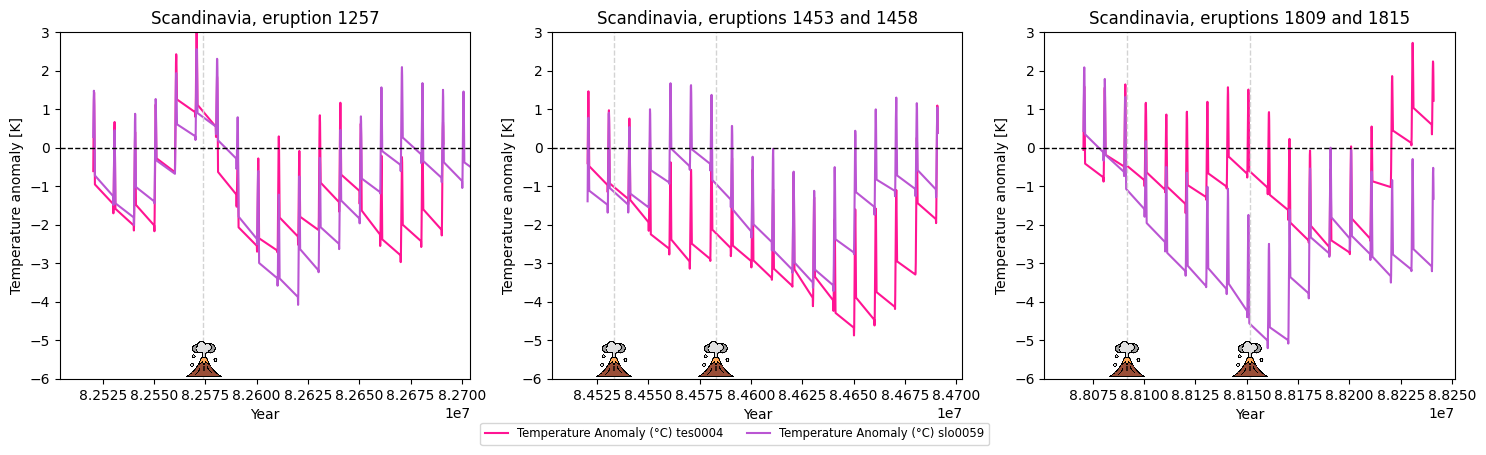

In [59]:
volcano_img = mpimg.imread("volcano.png")
volcano_icon = OffsetImage(volcano_img, zoom=0.05)

fig, ax = plt.subplots(1,3, figsize=(18,4.5))

# Plot anomalies
anomaly_smooth_surf041.plot(ax=ax[0], label='Temperature Anomaly (°C) tes0004', color='deeppink')
anomaly_smooth_surf591.plot(ax=ax[0], label='Temperature Anomaly (°C) slo0059', color='mediumorchid')
volcano=[vt_1257]
for vt in volcano:
    ax[0].axvline(x=vt, color='lightgray', linestyle='--', linewidth=1)
    ab0 = AnnotationBbox(volcano_icon, (vt, -5.5), frameon=False, box_alignment=(0.5, 0.5))
    ax[0].add_artist(ab0)
ax[0].set_xlim(numeric_1250, numeric_1270)
ax[0].set_ylim(-6, 3)
# Add zero line
ax[0].axhline(0, color='black', linestyle='--', linewidth=1)
ax[0].set_title('Scandinavia, eruption 1257')
ax[0].set_ylabel('Temperature anomaly [K]')
ax[0].set_xlabel('Year')

anomaly_smooth_surf042.plot(ax=ax[1], label='Temperature Anomaly (°C) tes0004', color='deeppink')
anomaly_smooth_surf592.plot(ax=ax[1], label='Temperature Anomaly (°C) slo0059', color='mediumorchid')
volcano=[vt_1453, vt_1458]
for vt in volcano:
    ax[1].axvline(x=vt, color='lightgray', linestyle='--', linewidth=1)
    ab1 = AnnotationBbox(volcano_icon, (vt, -5.5), frameon=False, box_alignment=(0.5, 0.5))
    ax[1].add_artist(ab1) 
ax[1].set_xlim(numeric_1450, numeric_1470)
ax[1].set_ylim(-6, 3)
# Add zero line
ax[1].axhline(0, color='black', linestyle='--', linewidth=1)
ax[1].set_title('Scandinavia, eruptions 1453 and 1458')
ax[1].set_ylabel('Temperature anomaly [K]')
ax[1].set_xlabel('Year')

anomaly_smooth_surf043.plot(ax=ax[2], label='Temperature Anomaly (°C) tes0004', color='deeppink')
anomaly_smooth_surf593.plot(ax=ax[2], label='Temperature Anomaly (°C) slo0059', color='mediumorchid')
volcano=[vt_1809, vt_1815]
for vt in volcano:
    ax[2].axvline(x=vt, color='lightgray', linestyle='--', linewidth=1)
    ab2 = AnnotationBbox(volcano_icon, (vt, -5.5), frameon=False, box_alignment=(0.5, 0.5))
    ax[2].add_artist(ab2) 
ax[2].set_xlim(numeric_1805, numeric_1825)
ax[2].set_ylim(-6, 3)
# Add zero line
ax[2].axhline(0, color='black', linestyle='--', linewidth=1)
ax[2].set_title('Scandinavia, eruptions 1809 and 1815')
ax[2].set_ylabel('Temperature anomaly [K]')
ax[2].set_xlabel('Year')

# Shared legend
handles, labels = ax[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.05), ncol=2, fontsize='small', frameon=True)

In [60]:
time_mask_591 = (scand59.time >= year_to_numeric(1250)) & (scand59.time <= year_to_numeric(1850))
anomaly_surf591=ts_scand59.sel(time=time_mask_591) - base_surf59
anomaly_smooth_surf591 = anomaly_surf591.rolling(time=300, center=True).mean()

time_mask_041 = (scand04.time >= year_to_numeric(1250)) & (scand04.time <= year_to_numeric(1850))
anomaly_surf041=ts_scand04.sel(time=time_mask_041) - base_surf04
anomaly_smooth_surf041 = anomaly_surf041.rolling(time=300, center=True).mean()

In [62]:
nh_lat = slice(90, 0)

nh59 = da_surf.sel(lat=nh_lat)
nh04 = ds_surf.sel(lat=nh_lat)

ts_nh59 = nh59['var169'].mean(dim=['lat', 'lon'])-273.12
ts_nh04 = nh04['var169'].mean(dim=['lat', 'lon'])-273.12

time_mask_nh59 = (nh59.time >= year_to_numeric(1250)) & (nh59.time <= year_to_numeric(1850))
time_mask_nh04 = (nh04.time >= year_to_numeric(1250)) & (nh04.time <= year_to_numeric(1850))

base_nh59 = ts_nh59.sel(time=time_mask_nh59).mean()
base_nh04 = ts_nh04.sel(time=time_mask_nh04).mean()

# anomalies
anomaly_surfnh59=ts_nh59.sel(time=time_mask_nh59) - base_nh59
anomaly_nh_smooth59 = anomaly_surfnh59.rolling(time=300, center=True).mean()

anomaly_surfnh04=ts_nh04.sel(time=time_mask_nh04) - base_nh04
anomaly_nh_smooth04 = anomaly_surfnh04.rolling(time=300, center=True).mean()

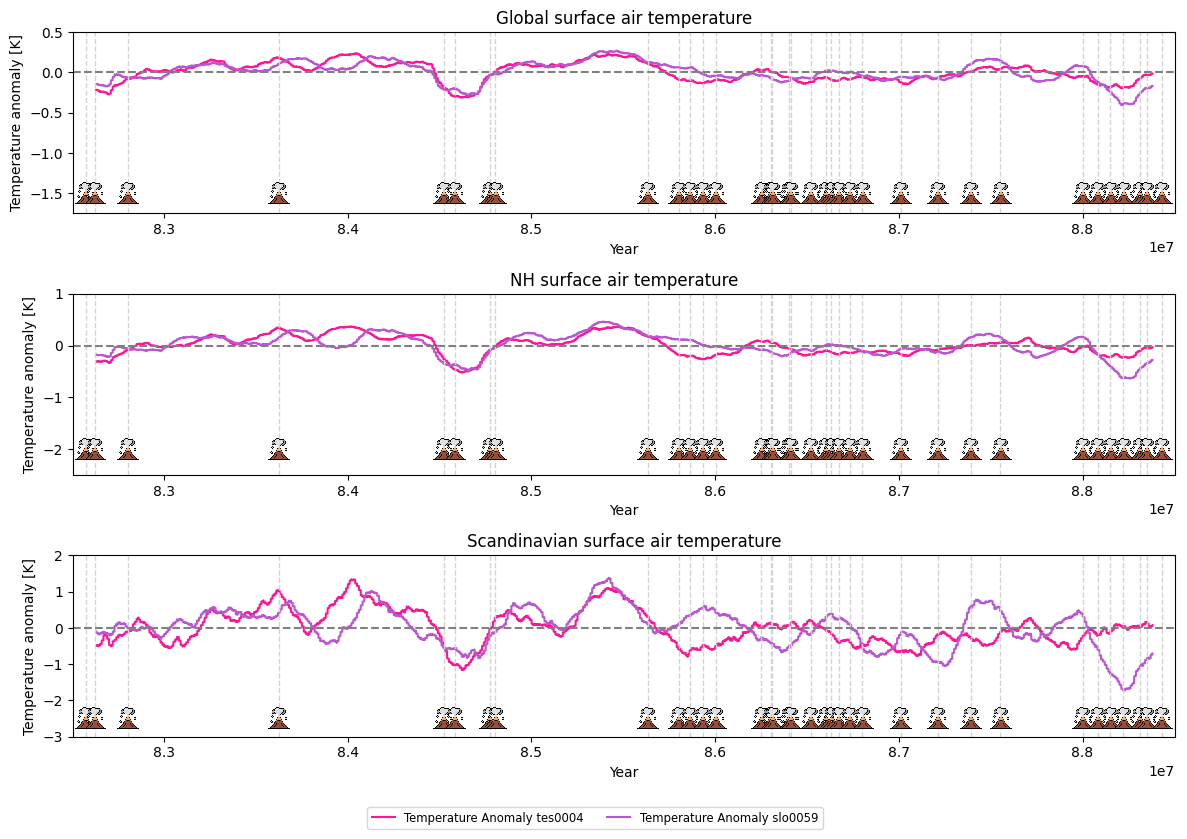

In [65]:
volcano = [1257, 1262, 1280, 1362, 1452, 1458, 1477, 1480, 1563, 1580, 1586, 1593, 
           1600, 1625, 1630, 1631, 1640, 1641, 1652, 1660, 1663, 1667, 1673, 1680, 
           1701, 1721, 1739, 1755, 1800, 1808, 1815, 1822, 1831, 1835, 1843]

volcano_img = mpimg.imread("volcano.png") 
volcano_icon = OffsetImage(volcano_img, zoom=0.03)

fig, ax=plt.subplots(3,1, figsize=(12,8))

anomaly_smooth_surf.plot(ax = ax[0], label='Temperature Anomaly tes0004', color='deeppink')
anomaly_smooth_surfa.plot(ax = ax[0], label='Temperature Anomaly slo0059', color='mediumorchid')
for vt in volcano:
    ax[0].axvline(x=year_to_numeric(vt), color='lightgray', linestyle='--', linewidth=1)
    ab1 = AnnotationBbox(volcano_icon, (year_to_numeric(vt), -1.5), frameon=False, box_alignment=(0.5, 0.5))
    ax[0].add_artist(ab1)

ax[0].axhline(0, linestyle='--', color='gray')
ax[0].set_xlim(year_to_numeric(1250), year_to_numeric(1850))
ax[0].set_ylim(-1.75, 0.5)
ax[0].set_title('Global surface air temperature')
ax[0].set_ylabel('Temperature anomaly [K]')
ax[0].set_xlabel('Year')

anomaly_nh_smooth04.plot(ax = ax[1], label='Temperature Anomaly tes0004', color='deeppink')
anomaly_nh_smooth59.plot(ax = ax[1], label='Temperature Anomaly slo0059', color='mediumorchid')

for vt in volcano:
    ax[1].axvline(x=year_to_numeric(vt), color='lightgray', linestyle='--', linewidth=1)
    ab = AnnotationBbox(volcano_icon, (year_to_numeric(vt), -2), frameon=False, box_alignment=(0.5, 0.5))
    ax[1].add_artist(ab)

ax[1].axhline(0, linestyle='--', color='gray')
ax[1].set_xlim(year_to_numeric(1250), year_to_numeric(1850))
ax[1].set_ylim(-2.5, 1)
ax[1].set_title('NH surface air temperature')
ax[1].set_ylabel('Temperature anomaly [K]')
ax[1].set_xlabel('Year')

anomaly_smooth_surf041.plot(ax = ax[2], label='Temperature Anomaly tes0004', color='deeppink')
anomaly_smooth_surf591.plot(ax = ax[2], label='Temperature Anomaly slo0059', color='mediumorchid')
for vt in volcano:
    ax[2].axvline(x=year_to_numeric(vt), color='lightgray', linestyle='--', linewidth=1)
    ab2 = AnnotationBbox(volcano_icon, (year_to_numeric(vt), -2.5), frameon=False, box_alignment=(0.5, 0.5))
    ax[2].add_artist(ab2)

ax[2].axhline(0, linestyle='--', color='gray')
ax[2].set_xlim(year_to_numeric(1250), year_to_numeric(1850))
ax[2].set_ylim(-3, 2)
ax[2].set_title('Scandinavian surface air temperature')
ax[2].set_ylabel('Temperature anomaly [K]')
ax[2].set_xlabel('Year')

handles, labels = ax[0].get_legend_handles_labels()
fig.legend(
    handles, labels,
    loc='lower center',
    bbox_to_anchor=(0.5, -0.05),
    ncol=2,
    fontsize='small',
    frameon=True
)

plt.tight_layout() 
plt.show()

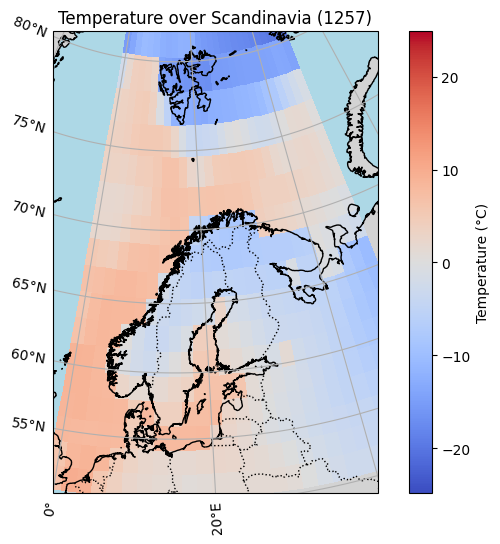

In [66]:
temp_snapshot = scand59['var169'].sel(time=year_to_numeric(1257), method = 'nearest')-273.12

proj = ccrs.LambertConformal(central_longitude=15, central_latitude=60)

fig = plt.figure(figsize=(8, 6))
ax = plt.axes(projection=proj)
ax.set_extent([0, 40, 50, 81], crs=ccrs.PlateCarree())

# Add features
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')
ax.coastlines(resolution='10m', color='black', linewidth=1)
ax.add_feature(cfeature.BORDERS, linestyle=':')

# Gridlines with labels
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
gl.top_labels = False
gl.right_labels = False

# Plot your data
temp_snapshot.plot(
    ax=ax,
    transform=ccrs.PlateCarree(),
    cmap='coolwarm',
    cbar_kwargs={'label': 'Temperature (°C)'}
)

ax.set_title("Temperature over Scandinavia (1257)")
plt.show()


In [47]:
# Years and prepare frames folder
years = range(1256, 1268)
os.makedirs("frames", exist_ok=True)
filenames = []

# Calculate global vmin and vmax over all years
temps = []
for year in years:
    temp = scand59['var169'].sel(time=year_to_numeric(year), method='nearest') - 273.12
    temps.append(temp)

all_temps = xr.concat(temps, dim='time')
vmin = float(all_temps.min())
vmax = float(all_temps.max())

# Make symmetric limits around zero for diverging colormap
abs_max = max(abs(vmin), abs(vmax))
vmin_sym = -abs_max
vmax_sym = abs_max

# Loop over years, create frames
for year in years:
    temp_snapshot = scand59['var169'].sel(time=year_to_numeric(year), method='nearest') - 273.12
    
    proj = ccrs.LambertConformal(central_longitude=15, central_latitude=60)
    fig = plt.figure(figsize=(8, 6))
    ax = plt.axes(projection=proj)
    ax.set_extent([0, 40, 50, 81], crs=ccrs.PlateCarree())

    # Add map features
    ax.add_feature(cfeature.LAND, facecolor='lightgray')
    ax.add_feature(cfeature.OCEAN, facecolor='lightblue')
    ax.coastlines(resolution='10m', color='black', linewidth=1)
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    
    gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
    gl.top_labels = False
    gl.right_labels = False
    
    # Create norm for centered colormap
    norm = TwoSlopeNorm(vmin=vmin_sym, vcenter=0, vmax=vmax_sym)
    
    # Plot temperature with fixed color scale and norm
    temp_snapshot.plot(
        ax=ax,
        transform=ccrs.PlateCarree(),
        cmap='coolwarm',
        norm=norm,
        cbar_kwargs={'label': 'Temperature (°C)'}
    )
    
    ax.set_title(f"Temperature over Scandinavia ({year})")
    
    filename = f"frames/frame_{year}.png"
    plt.savefig(filename, dpi=150, bbox_inches='tight')
    filenames.append(filename)
    plt.close(fig)

# Create GIF
with imageio.get_writer('scandinavia_temp_1256_1267.gif', mode='I', duration=1.2) as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)

# Clean up (optional)
for filename in filenames:
    os.remove(filename)
os.rmdir("frames")

print("✅ GIF saved as 'scandinavia_temp_1256_1267.gif'")

/tmp/ipykernel_744718/3308752200.py:62: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)


✅ GIF saved as 'scandinavia_temp_1256_1267.gif'


In [48]:
# Define years range
years = range(1457, 1469)  # 1457–1468 inclusive

# Directory for temporary frames
os.makedirs("frames", exist_ok=True)
filenames = []

# Calculate global vmin and vmax over all years
temps = []
for year in years:
    temp = scand59['var169'].sel(time=year_to_numeric(year), method='nearest') - 273.12
    temps.append(temp)

all_temps = xr.concat(temps, dim='time')
vmin = float(all_temps.min())
vmax = float(all_temps.max())

# Make symmetric limits around zero for diverging colormap
abs_max = max(abs(vmin), abs(vmax))
vmin_sym = -abs_max
vmax_sym = abs_max

# Loop over years, create frames
for year in years:
    temp_snapshot = scand59['var169'].sel(time=year_to_numeric(year), method='nearest') - 273.12
    
    proj = ccrs.LambertConformal(central_longitude=15, central_latitude=60)
    fig = plt.figure(figsize=(8, 6))
    ax = plt.axes(projection=proj)
    ax.set_extent([0, 40, 50, 81], crs=ccrs.PlateCarree())

    # Add map features
    ax.add_feature(cfeature.LAND, facecolor='lightgray')
    ax.add_feature(cfeature.OCEAN, facecolor='lightblue')
    ax.coastlines(resolution='10m', color='black', linewidth=1)
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    
    gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
    gl.top_labels = False
    gl.right_labels = False
    
    # Create norm for centered colormap
    norm = TwoSlopeNorm(vmin=vmin_sym, vcenter=0, vmax=vmax_sym)
    
    # Plot temperature with fixed color scale and norm
    temp_snapshot.plot(
        ax=ax,
        transform=ccrs.PlateCarree(),
        cmap='coolwarm',
        norm=norm,
        cbar_kwargs={'label': 'Temperature (°C)'}
    )
    
    ax.set_title(f"Temperature over Scandinavia ({year})")
    
    filename = f"frames/frame_{year}.png"
    plt.savefig(filename, dpi=150, bbox_inches='tight')
    filenames.append(filename)
    plt.close(fig)

# Create GIF from frames
with imageio.get_writer('scandinavia_temp_1457_1469.gif', mode='I', duration=1.2) as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)

# Clean up temporary files and directory
for filename in filenames:
    os.remove(filename)
os.rmdir("frames")

print("✅ GIF saved as 'scandinavia_temp_1457_1469.gif'")


/tmp/ipykernel_744718/3938312651.py:64: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)


✅ GIF saved as 'scandinavia_temp_1457_1469.gif'


In [49]:
# Directory to save temporary frames
os.makedirs("frames", exist_ok=True)

years = range(1814, 1826)  # 1814, 1826 inclusive
filenames = []

# Calculate global vmin and vmax over all years
temps = []
for year in years:
    temp = scand59['var169'].sel(time=year_to_numeric(year), method='nearest') - 273.12
    temps.append(temp)

all_temps = xr.concat(temps, dim='time')
vmin = float(all_temps.min())
vmax = float(all_temps.max())

# Make symmetric limits around zero for diverging colormap
abs_max = max(abs(vmin), abs(vmax))
vmin_sym = -abs_max
vmax_sym = abs_max

# Loop over years, create frames
for year in years:
    temp_snapshot = scand59['var169'].sel(time=year_to_numeric(year), method='nearest') - 273.12
    
    proj = ccrs.LambertConformal(central_longitude=15, central_latitude=60)
    fig = plt.figure(figsize=(8, 6))
    ax = plt.axes(projection=proj)
    ax.set_extent([0, 40, 50, 81], crs=ccrs.PlateCarree())

    # Add map features
    ax.add_feature(cfeature.LAND, facecolor='lightgray')
    ax.add_feature(cfeature.OCEAN, facecolor='lightblue')
    ax.coastlines(resolution='10m', color='black', linewidth=1)
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    
    gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
    gl.top_labels = False
    gl.right_labels = False
    
    # Create norm for centered colormap
    norm = TwoSlopeNorm(vmin=vmin_sym, vcenter=0, vmax=vmax_sym)
    
    # Plot temperature with fixed color scale and norm
    temp_snapshot.plot(
        ax=ax,
        transform=ccrs.PlateCarree(),
        cmap='coolwarm',
        norm=norm,
        cbar_kwargs={'label': 'Temperature (°C)'}
    )
    
    ax.set_title(f"Temperature over Scandinavia ({year})")
    
    filename = f"frames/frame_{year}.png"
    plt.savefig(filename, dpi=150, bbox_inches='tight')
    filenames.append(filename)
    plt.close(fig)

# Create GIF
with imageio.get_writer('scandinavia_temp_1814_1826.gif', mode='I', duration=1.2) as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)

# Clean up (optional)
for filename in filenames:
    os.remove(filename)
os.rmdir("frames")

print("✅ GIF saved as 'scandinavia_temp_1814_1826.gif'")

/tmp/ipykernel_744718/2838383213.py:63: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)


✅ GIF saved as 'scandinavia_temp_1814_1826.gif'
